In [1]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes

In [2]:
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25,
            initState = [200,200], adversaryMode='fight_132')

In [3]:
game.reset()

(tensor([200., 200.]), 0, False)

In [4]:
game.adversaryChoosePrice()

135.5

In [5]:
import torch
import torch.nn as nn
from torch.distributions import Categorical

# Hyperparameters
def NeuralNetwork():
    lr = .000001
    num_actions = 20

    nn_ = 100

    policy = nn.Sequential(
                           nn.Linear(2, nn_), 
                           nn.ReLU(),
                           nn.Linear(nn_,nn_),
                           nn.ReLU(),
                           nn.Linear(nn_,num_actions),                       
                           nn.Softmax(dim=0))
    optim = torch.optim.Adam(policy.parameters(), lr=lr)

    return policy, optim


In [6]:
algorithm = ReinforceAlgorithm(game, NeuralNetwork, numberIterations=4, numberEpisodes=1000000, discountFactor =0.9)

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000


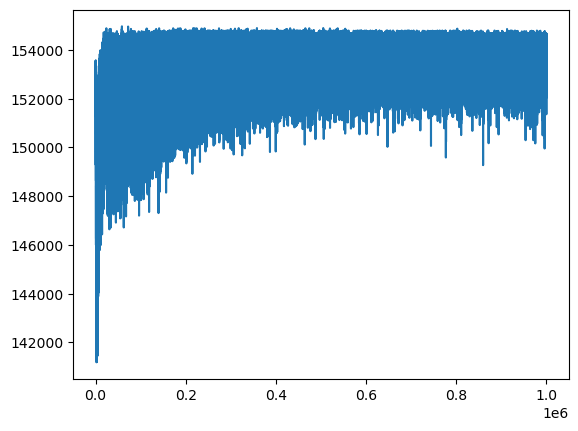

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000


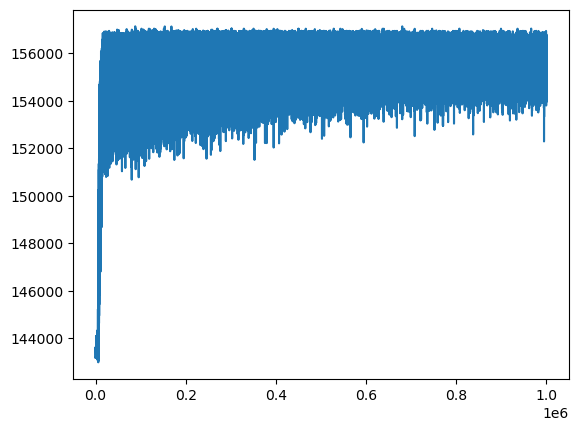

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000


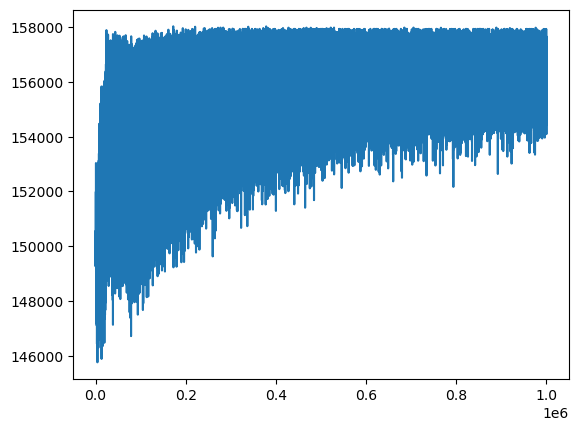

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000


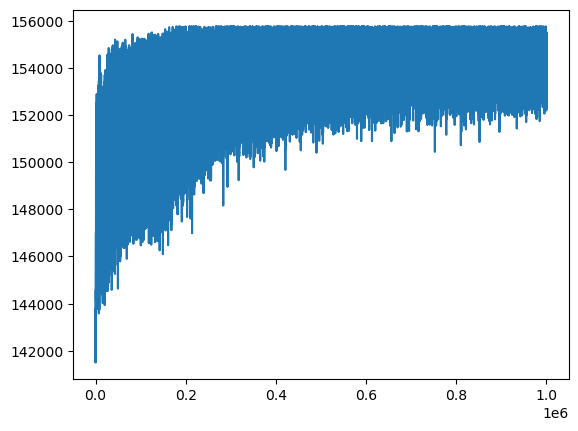

In [7]:
algorithm.solver()

In [8]:
algorithm.bestAverageRetu

155954.7780020328

In [32]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns.mean(axis = 0),columns=['entry'])

<AxesSubplot:>

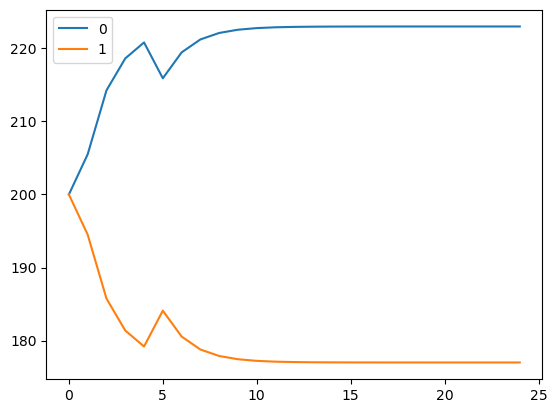

In [10]:
demandPotential.plot()

In [11]:
profits.sum(axis=0)

0    154112.710579
1     71376.706899
dtype: float64

<AxesSubplot:>

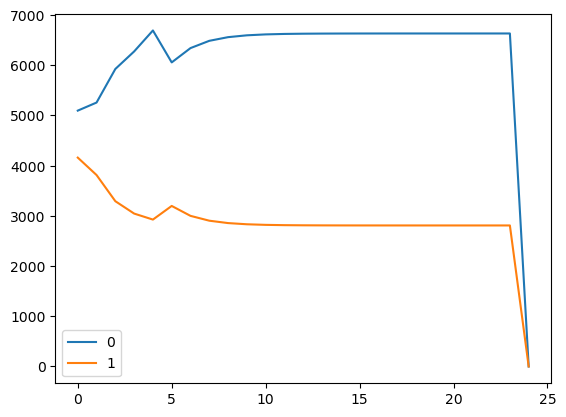

In [12]:
profits.plot()

<AxesSubplot:>

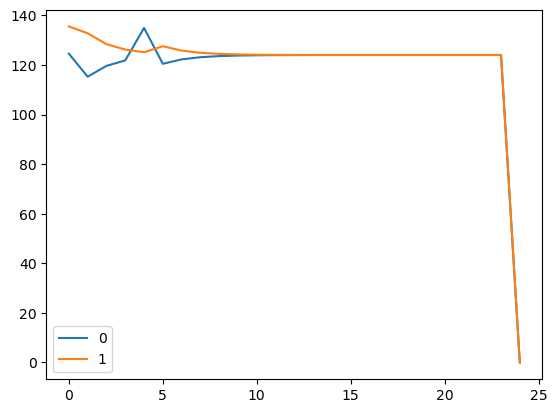

In [13]:
prices.plot()

<AxesSubplot:>

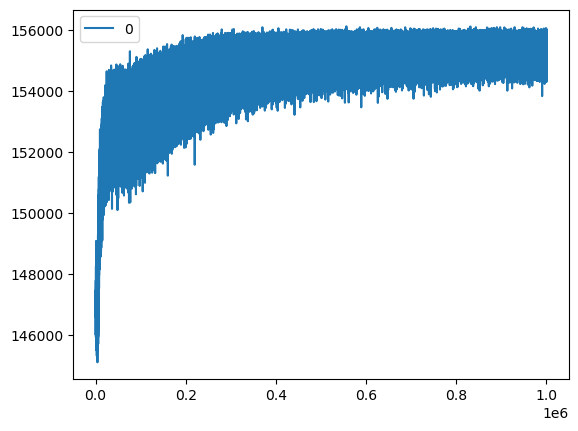

In [14]:
learning.plot()

In [28]:
# pricelearning = pd.DataFrame(game.prices.mean(axis = 0))
# pricelearning.plot()

In [47]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [75]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

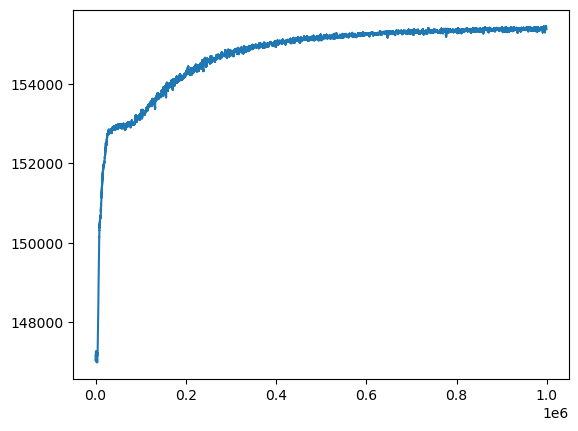

In [76]:
plt.plot(avg_learning)
plt.show()